# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv', ',') 

internet_df = pd.read_csv('/datasets/megaline_internet.csv', ',') 

messages_df = pd.read_csv('/datasets/megaline_messages.csv', ',')

plans_df = pd.read_csv('/datasets/megaline_plans.csv', ',') 

users_df = pd.read_csv('/datasets/megaline_users.csv', ',') 


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans_df.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

La tabla nos muestra la informacion relevante de los dos planes hay disponibles 

Los datos parecen ser objetos en lugar de numeros enteros, se arregla convirtiendolos a int o float segun el caso.

Necesitariamos convertir mb_per_month_included ya que usa megabytes, pero el costo adicional es en GB (usd_per_gb). 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:

# Convertir MB a GB para consistencia en las unidades
plans_df['gb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

# Confirmar valores nulos
print(plans_df.isnull().sum())

plans_df.head()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
gb_per_month_included    0
dtype: int64


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
plans_df['cost_per_minute_included'] = plans_df['usd_monthly_pay'] / plans_df['minutes_included']
plans_df['cost_per_message_included'] = plans_df['usd_monthly_pay'] / plans_df['messages_included']
plans_df['cost_per_gb_included'] = plans_df['usd_monthly_pay'] / plans_df['gb_per_month_included']

plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,cost_per_minute_included,cost_per_message_included,cost_per_gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.040000,0.40,1.333333
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.023333,0.07,2.333333


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users_df.sample(n=10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
158,1158,Robin,Thornton,20,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-11-30,ultimate,NaN
150,1150,Earlie,Giles,46,"Houston-The Woodlands-Sugar Land, TX MSA",2018-09-19,ultimate,NaN
250,1250,Milan,Sellers,57,"Houston-The Woodlands-Sugar Land, TX MSA",2018-04-03,ultimate,NaN
405,1405,Shella,Hunter,34,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-22,ultimate,NaN
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
180,1180,Wonda,Hays,24,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-01,surf,2018-12-22
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaN
346,1346,Emmie,Gonzalez,59,"Tucson, AZ MSA",2018-04-26,ultimate,NaN
33,1033,Latoyia,Moran,28,"Oklahoma City, OK MSA",2018-05-30,ultimate,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Debemos confirmar el formato correcto para las fechas y determinar como vamos a manejar los valores ausentes que hay en churn_date, si hay una fecha en alguna fila significa que el usuario dejo de ser miembro del plan, podemos contar cuantos hay en el data frame 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:

# Se convierten las columnas de fecha a formato datetime
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], errors='coerce')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')

# Crear una columna bool para identificar usuarios activos
users_df['is_active'] = users_df['churn_date'].isna()

users_df.info()
users_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_active   500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
# Podemos calcular la duración de la suscripción en días (para usuarios inactivos)
users_df['subscription_duration'] = (users_df['churn_date'] - users_df['reg_date']).dt.days

# Podemos calcular la antigüedad del usuario en días desde el registro hasta hoy (para usuarios activos)
users_df['days_since_registration'] = (pd.Timestamp.today() - users_df['reg_date']).dt.days

# Mostrar información general después de las correcciones
users_df.info()
users_df.sample(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  500 non-null    int64         
 1   first_name               500 non-null    object        
 2   last_name                500 non-null    object        
 3   age                      500 non-null    int64         
 4   city                     500 non-null    object        
 5   reg_date                 500 non-null    datetime64[ns]
 6   plan                     500 non-null    object        
 7   churn_date               34 non-null     datetime64[ns]
 8   is_active                500 non-null    bool          
 9   subscription_duration    34 non-null     float64       
 10  days_since_registration  500 non-null    int64         
dtypes: bool(1), datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.7+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active,subscription_duration,days_since_registration
266,1266,Dorie,Chandler,62,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-13,surf,NaT,True,NaN,2302
171,1171,Devin,Wilkinson,56,"Boston-Cambridge-Newton, MA-NH MSA",2018-01-27,surf,NaT,True,NaN,2622
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,NaT,True,NaN,2319
475,1475,Arlen,Sutton,66,"Dallas-Fort Worth-Arlington, TX MSA",2018-05-28,ultimate,NaT,True,NaN,2501
18,1018,Dennis,Grimes,70,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-17,surf,NaT,True,NaN,2359
20,1020,Rutha,Bell,56,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-08,surf,NaT,True,NaN,2337
236,1236,Odell,Juarez,74,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-04-04,ultimate,NaT,True,NaN,2555
192,1192,Korey,Goodwin,36,"Buffalo-Cheektowaga, NY MSA",2018-10-02,surf,NaT,True,NaN,2374
460,1460,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,NaT,True,NaN,2501
244,1244,Demarcus,Ellis,75,"Birmingham-Hoover, AL MSA",2018-02-05,surf,NaT,True,NaN,2613


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Imprime una muestra de datos para las llamadas
calls_df.sample(n=10)

,id,user_id,call_date,duration
124406,1439_274,1439,2018-06-01,17.70
72196,1256_649,1256,2018-11-18,9.21
76097,1268_601,1268,2018-06-09,4.13
37149,1140_433,1140,2018-09-18,14.77
2772,1010_372,1010,2018-11-06,8.16
123410,1435_40,1435,2018-10-24,1.78
132839,1479_111,1479,2018-12-19,0.00
111985,1393_178,1393,2018-11-04,9.59
98944,1354_465,1354,2018-08-28,5.82
81714,1294_64,1294,2018-11-07,7.44


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

ID es un numero de identificacion unico que deberiamos tratar como int pero ya que tiene un guion bajo lo trataremos como str 
call_date lo cambiariamos a formato datetime

duration lo seguiremos usando como float ya que lo podriamos usar como minutos y segundos gracias al punto decimal

Algunas llamadas en la muestra tienen una duracion de 0.00, podriamos contar cuentas llamadas de estas hay para completar nuestros datos 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
# Tenemos que convertir la columna de fecha a datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
# Crear una columna bool para identificar llamadas con duración 0
calls_df['failed_call'] = calls_df['duration'] == 0

# Mostrar la información después de las correcciones
calls_df.info()
calls_df.sample(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           137735 non-null  object        
 1   user_id      137735 non-null  int64         
 2   call_date    137735 non-null  datetime64[ns]
 3   duration     137735 non-null  float64       
 4   failed_call  137735 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.3+ MB


,id,user_id,call_date,duration,failed_call
83170,1301_84,1301,2018-12-30,15.29,False
130342,1468_98,1468,2018-12-12,7.80,False
62540,1225_4,1225,2018-12-21,0.00,True
115563,1404_357,1404,2018-08-21,2.94,False
6205,1029_369,1029,2018-11-12,0.94,False
20427,1077_394,1077,2018-05-08,3.79,False
84180,1308_66,1308,2018-12-19,4.93,False
109585,1386_45,1386,2018-12-15,0.00,True
108669,1383_419,1383,2018-12-24,0.25,False
46987,1171_18,1171,2018-07-10,8.84,False


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
messages_df.sample(n=10)

,id,user_id,message_date
59141,1374_315,1374,2018-10-26
15936,1105_135,1105,2018-12-04
3943,1039_41,1039,2018-08-10
32947,1205_22,1205,2018-12-15
75871,1494_109,1494,2018-10-26
36150,1240_31,1240,2018-09-18
25505,1154_88,1154,2018-12-21
38881,1254_600,1254,2018-12-25
56405,1356_76,1356,2018-09-29
38992,1254_794,1254,2018-11-16


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
id contiene la identificaion de numero unico para el mensaje la primera parte siendo el user_id y la segunda parte despues del guion bajo podemos considerar que es el No. del mensaje


user_id tiene el formato correcto de int64


tendremos que convertir message_date a formato de datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
# Convertimos la columna de fecha a datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
messages_df.info()
messages_df.sample(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
1361,1011_324,1011,2018-07-22
205,1001_400,1001,2018-11-26
16821,1111_335,1111,2018-09-20
30071,1188_89,1188,2018-11-23
3548,1036_383,1036,2018-11-10
61347,1384_458,1384,2018-08-21
63857,1407_85,1407,2018-12-22
59860,1380_356,1380,2018-11-03
61750,1385_214,1385,2018-10-27
60000,1381_113,1381,2018-10-18


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
internet_df.sample(n=10)

,id,user_id,session_date,mb_used
98884,1467_21,1467,2018-08-16,0.00
25708,1120_244,1120,2018-08-31,305.84
84763,1396_89,1396,2018-10-25,351.15
89433,1412_148,1412,2018-10-26,518.31
63858,1293_177,1293,2018-11-29,562.27
93283,1435_49,1435,2018-10-10,296.90
65022,1299_310,1299,2018-08-14,655.41
65431,1301_121,1301,2018-11-25,194.18
11610,1056_277,1056,2018-12-25,991.56
43547,1193_516,1193,2018-07-25,310.28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

id es tipo object ya que tiene tiene el guion bajo, correcto para ser un identificador unico 

user_id lo seguiremos usando como int64

neceitamos cambiar session_date a formato datetime

mb_used seguiriamos usandolo como float64

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
# Podemos convertir la columna de fecha a datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
internet_df.info()
internet_df.sample(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
5534,1030_133,1030,2018-11-19,187.37
46455,1206_307,1206,2018-10-24,569.94
515,1004_119,1004,2018-10-27,6.26
47307,1211_184,1211,2018-11-16,925.40
78517,1366_206,1366,2018-09-15,451.27
52638,1237_18,1237,2018-10-20,845.08
65324,1301_14,1301,2018-12-20,826.05
28447,1131_30,1131,2018-06-05,508.24
85202,1397_557,1397,2018-07-09,373.08
48329,1215_51,1215,2018-12-10,276.44


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans_df.info()
plans_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   messages_included          2 non-null      int64  
 1   mb_per_month_included      2 non-null      int64  
 2   minutes_included           2 non-null      int64  
 3   usd_monthly_pay            2 non-null      int64  
 4   usd_per_gb                 2 non-null      int64  
 5   usd_per_message            2 non-null      float64
 6   usd_per_minute             2 non-null      float64
 7   plan_name                  2 non-null      object 
 8   gb_per_month_included      2 non-null      float64
 9   cost_per_minute_included   2 non-null      float64
 10  cost_per_message_included  2 non-null      float64
 11  cost_per_gb_included       2 non-null      float64
dtypes: float64(6), int64(5), object(1)
memory usage: 320.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,cost_per_minute_included,cost_per_message_included,cost_per_gb_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.040000,0.40,1.333333
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.023333,0.07,2.333333


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_df['call_month'] = calls_df['call_date'].dt.month
calls_df['call_year'] = calls_df['call_date'].dt.year

calls_per_user_per_month = calls_df.groupby(['user_id', 'call_year', 'call_month']).size().reset_index(name='call_count')

calls_per_user_per_month.head(20)

,user_id,call_year,call_month,call_count
0,1000,2018,12,16
1,1001,2018,8,27
2,1001,2018,9,49
3,1001,2018,10,65
4,1001,2018,11,64
5,1001,2018,12,56
6,1002,2018,10,11
7,1002,2018,11,55
8,1002,2018,12,47
9,1003,2018,12,149


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_user_per_month = calls_df.groupby(['user_id', 'call_year', 'call_month'])['duration'].sum().reset_index(name='total_minutes')

minutes_per_user_per_month.head(20)

,user_id,call_year,call_month,total_minutes
0,1000,2018,12,116.83
1,1001,2018,8,171.14
2,1001,2018,9,297.69
3,1001,2018,10,374.11
4,1001,2018,11,404.59
5,1001,2018,12,392.93
6,1002,2018,10,54.13
7,1002,2018,11,359.76
8,1002,2018,12,363.24
9,1003,2018,12,1041.00


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
import pandas as pd

messages_df = pd.read_csv('/datasets/megaline_messages.csv', ',')

#Convertimos a datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], errors='coerce')

# Extraemos mes y año de 'session_date'
messages_df['message_month'] = messages_df['message_date'].dt.month
messages_df['message_year'] = messages_df['message_date'].dt.year

messages_per_user_per_month = messages_df.groupby(['user_id', 'message_year', 'message_month']).size().reset_index(name='message_count')

messages_per_user_per_month.head(20)

,user_id,message_year,message_month,message_count
0,1000,2018,12,11
1,1001,2018,8,30
2,1001,2018,9,44
3,1001,2018,10,53
4,1001,2018,11,36
5,1001,2018,12,44
6,1002,2018,10,15
7,1002,2018,11,32
8,1002,2018,12,41
9,1003,2018,12,50


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

import pandas as pd 

internet_df = pd.read_csv('/datasets/megaline_internet.csv', ',') 

#Convertimos a datetime
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], errors='coerce')

# Extraemos mes y año de 'session_date'
internet_df['session_month'] = internet_df['session_date'].dt.month
internet_df['session_year'] = internet_df['session_date'].dt.year

internet_traffic_per_user_per_month = internet_df.groupby(['user_id', 'session_year', 'session_month'])['mb_used'].sum().reset_index(name='total_traffic_mb')

internet_traffic_per_user_per_month.head(20)

,user_id,session_year,session_month,total_traffic_mb
0,1000,2018,12,1901.47
1,1001,2018,8,6919.15
2,1001,2018,9,13314.82
3,1001,2018,10,22330.49
4,1001,2018,11,18504.30
5,1001,2018,12,19369.18
6,1002,2018,10,6552.01
7,1002,2018,11,19345.08
8,1002,2018,12,14396.24
9,1003,2018,12,27044.14


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
import pandas as pd

calls_df = pd.read_csv('/datasets/megaline_calls.csv', ',')
messages_df = pd.read_csv('/datasets/megaline_messages.csv', ',')
internet_df = pd.read_csv('/datasets/megaline_internet.csv', ',')

# Confirmar que las fechas estén en formato datetime y extraer mes/año

# Para llamadas
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], errors='coerce')
calls_df['call_month'] = calls_df['call_date'].dt.month
calls_df['call_year'] = calls_df['call_date'].dt.year

# Para mensajes
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], errors='coerce')
messages_df['message_month'] = messages_df['message_date'].dt.month
messages_df['message_year'] = messages_df['message_date'].dt.year

# Para internet
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], errors='coerce')
internet_df['session_month'] = internet_df['session_date'].dt.month
internet_df['session_year'] = internet_df['session_date'].dt.year

# Agregamos datos por mes y usuario

calls_per_user_per_month = calls_df.groupby(['user_id', 'call_year', 'call_month']).size().reset_index(name='call_count')

messages_per_user_per_month = messages_df.groupby(['user_id', 'message_year', 'message_month']).size().reset_index(name='message_count')

internet_traffic_per_user_per_month = internet_df.groupby(['user_id', 'session_year', 'session_month'])['mb_used'].sum().reset_index(name='total_traffic_mb')

# Primero fusionamos las llamadas con los mensajes
merged_df = pd.merge(calls_per_user_per_month, messages_per_user_per_month, 
                     left_on=['user_id', 'call_year', 'call_month'], 
                     right_on=['user_id', 'message_year', 'message_month'], 
                     how='outer')

# Ahora fusionamos con el tráfico de internet
merged_df = pd.merge(merged_df, internet_traffic_per_user_per_month, 
                     left_on=['user_id', 'call_year', 'call_month'], 
                     right_on=['user_id', 'session_year', 'session_month'], 
                     how='outer')

# Eliminamos las columnas extra de año y mes
merged_df = merged_df.drop(columns=['message_year', 'message_month', 'session_year', 'session_month'])

merged_df.head(20)

,user_id,call_year,call_month,call_count,message_count,total_traffic_mb
0,1000,2018.0,12.0,16.0,11.0,1901.47
1,1001,2018.0,8.0,27.0,30.0,6919.15
2,1001,2018.0,9.0,49.0,44.0,13314.82
3,1001,2018.0,10.0,65.0,53.0,22330.49
4,1001,2018.0,11.0,64.0,36.0,18504.30
5,1001,2018.0,12.0,56.0,44.0,19369.18
6,1002,2018.0,10.0,11.0,15.0,6552.01
7,1002,2018.0,11.0,55.0,32.0,19345.08
8,1002,2018.0,12.0,47.0,41.0,14396.24
9,1003,2018.0,12.0,149.0,50.0,27044.14


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
# Calcula el ingreso mensual para cada usuario
import pandas as pd
import numpy as np

calls_df = pd.read_csv('/datasets/megaline_calls.csv', ',')
internet_df = pd.read_csv('/datasets/megaline_internet.csv', ',')
messages_df = pd.read_csv('/datasets/megaline_messages.csv', ',')
plans_df = pd.read_csv('/datasets/megaline_plans.csv', ',')
users_df = pd.read_csv('/datasets/megaline_users.csv', ',')

# Fechas a formato datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], errors='coerce')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], errors='coerce')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], errors='coerce')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], errors='coerce')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')

# Extraer año-mes en formato 'Periodo'
calls_df['month'] = calls_df['call_date'].dt.to_period('M')
internet_df['month'] = internet_df['session_date'].dt.to_period('M')
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

# Redondear minutos al alza (cobro por minuto completo)
calls_df['duration'] = np.ceil(calls_df['duration'])

# Calcular uso mensual de llamadas, mensajes y datos
calls_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()
messages_per_month = messages_df.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id': 'messages_sent'})
internet_per_month = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Convertir MB a GB
internet_per_month['gb_used'] = internet_per_month['mb_used'] / 1024

# Unir datos de uso con los usuarios
user_usage = users_df[['user_id', 'plan']].merge(calls_per_month, on='user_id', how='left') \
                                         .merge(messages_per_month, on=['user_id', 'month'], how='left') \
                                         .merge(internet_per_month, on=['user_id', 'month'], how='left')

# Reemplazar NaN solo en columnas numéricas 
num_cols = user_usage.select_dtypes(include=['number']).columns
user_usage[num_cols] = user_usage[num_cols].fillna(0)

# Unir con los datos del plan
user_usage = user_usage.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Excedentes (máximo entre 0 y el uso extra)
user_usage['extra_minutes'] = np.maximum(user_usage['duration'] - user_usage['minutes_included'], 0)
user_usage['extra_messages'] = np.maximum(user_usage['messages_sent'] - user_usage['messages_included'], 0)
user_usage['extra_gb'] = np.maximum(user_usage['gb_used'] - (user_usage['mb_per_month_included'] / 1024), 0)

# Costos adicionales
user_usage['extra_cost_minutes'] = user_usage['extra_minutes'] * user_usage['usd_per_minute']
user_usage['extra_cost_messages'] = user_usage['extra_messages'] * user_usage['usd_per_message']
user_usage['extra_cost_gb'] = user_usage['extra_gb'] * user_usage['usd_per_gb']

# Ingreso total user per month
user_usage['total_revenue'] = user_usage['usd_monthly_pay'] + user_usage['extra_cost_minutes'] + user_usage['extra_cost_messages'] + user_usage['extra_cost_gb']

# Imprimir solo las columnas solicitadas
monthly_revenue = user_usage[['user_id', 'month', 'total_revenue']]

monthly_revenue.sample(n=20)


,user_id,month,total_revenue
408,1085,2018-10,70.000000
11,1004,2018-06,71.883008
513,1110,2018-05,20.000000
508,1109,2018-08,20.420000
24,1007,2018-11,108.356719
335,1072,2018-08,134.325586
317,1068,2018-09,20.000000
90,1027,2018-08,68.741211
570,1122,2018-09,89.108203
332,1071,2018-11,20.000000


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

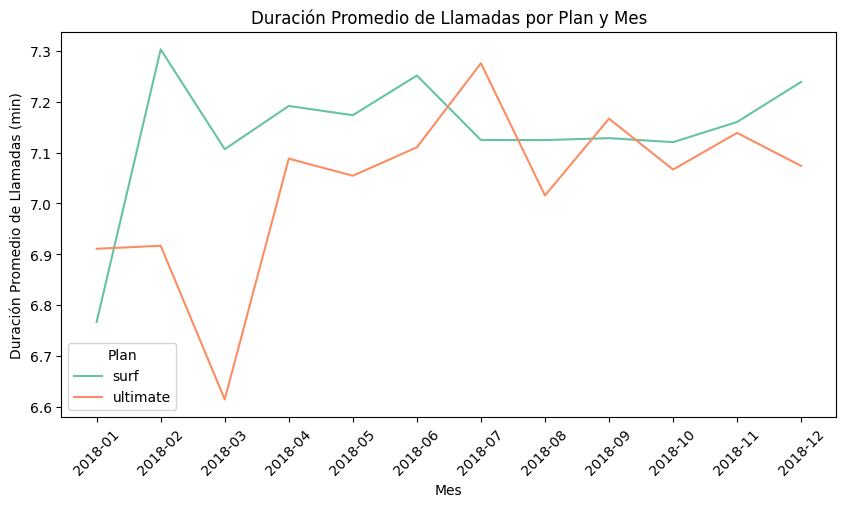

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
import matplotlib.pyplot as plt
import seaborn as sns

# Se une el uso de llamadas con el plan de cada usuario
calls_with_plan = calls_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Redondear minutos al alza (se cobra por minuto completo)
calls_with_plan['duration'] = np.ceil(calls_with_plan['duration'])

# Year-Month
calls_with_plan['month'] = calls_with_plan['call_date'].dt.to_period('M')

# Plan-Month
avg_call_duration = calls_with_plan.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Period a str
avg_call_duration['month'] = avg_call_duration['month'].astype(str)

# Grafico de barras 
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_call_duration, x='month', y='duration', hue='plan', palette='Set2')

plt.title("Duración Promedio de Llamadas por Plan y Mes")
plt.xlabel("Mes")
plt.ylabel("Duración Promedio de Llamadas (min)")
plt.xticks(rotation=45)
plt.legend(title="Plan")

plt.show()


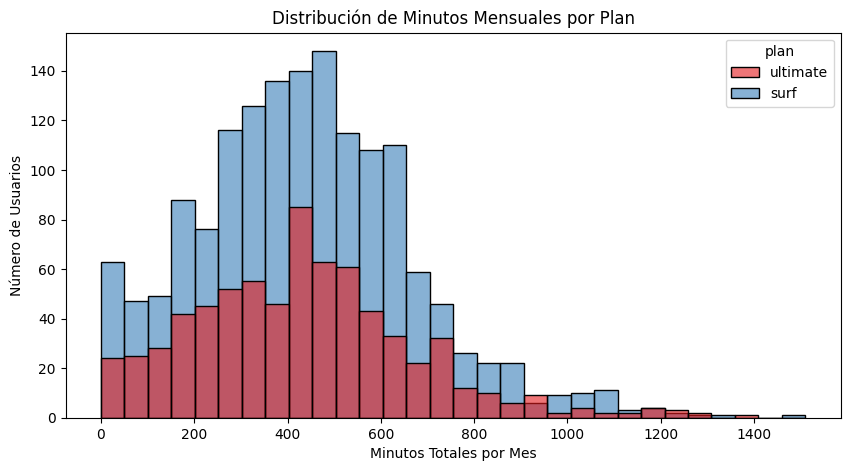

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cllas-User
calls_with_plan = calls_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Redondear minutos al alza (se cobra por minuto completo)
calls_with_plan['duration'] = np.ceil(calls_with_plan['duration'])

# Year-Month
calls_with_plan['month'] = calls_with_plan['call_date'].dt.to_period('M')

# Monthly Minutes per User
monthly_minutes = calls_with_plan.groupby(['user_id', 'month', 'plan'])['duration'].sum().reset_index()

plt.figure(figsize=(10, 5))

sns.histplot(data=monthly_minutes, x='duration', hue='plan', bins=30, palette='Set1', alpha=0.6)

plt.title("Distribución de Minutos Mensuales por Plan")
plt.xlabel("Minutos Totales por Mes")
plt.ylabel("Número de Usuarios")

plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
# Calcula la media y la varianza de la duración mensual de llamadas.
import numpy as np
import pandas as pd

# Se unen las llamadas con el plan del usuario
calls_with_plan = calls_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Redondear minutos al alza (se cobra por minuto completo)
calls_with_plan['duration'] = np.ceil(calls_with_plan['duration'])

# Year-Month
calls_with_plan['month'] = pd.to_datetime(calls_with_plan['call_date']).dt.to_period('M')

# Monthly minutes per user 
monthly_minutes = calls_with_plan.groupby(['user_id', 'month'])['duration'].sum().reset_index()

mean_duration = monthly_minutes['duration'].mean()  
variance_duration = monthly_minutes['duration'].var()

# Mostrar resultados
print(f"Media de la duración mensual de llamadas: {mean_duration} minutos")
print(f"Varianza de la duración mensual de llamadas: {variance_duration} minutos²")


Media de la duración mensual de llamadas: 435.9375553587245 minutos
Varianza de la duración mensual de llamadas: 53811.16800855365 minutos²


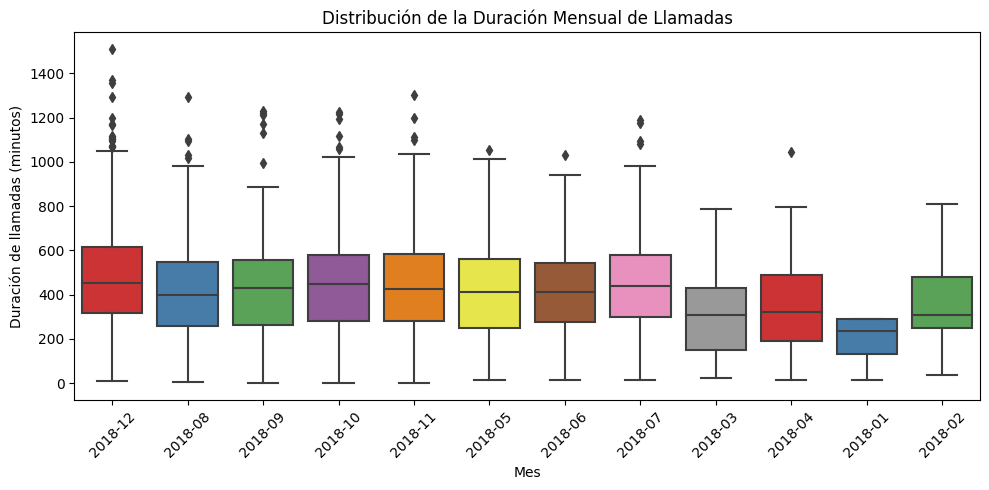

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
import matplotlib.pyplot as plt

calls_with_plan = calls_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Redondear minutos al alza (se cobra por minuto completo)
calls_with_plan['duration'] = np.ceil(calls_with_plan['duration'])

# Year-Month
calls_with_plan['month'] = pd.to_datetime(calls_with_plan['call_date']).dt.to_period('M')

# User and Month
monthly_minutes = calls_with_plan.groupby(['user_id', 'month'])['duration'].sum().reset_index()

plt.figure(figsize=(10, 5))  
sns.boxplot(x='month', y='duration', data=monthly_minutes, palette='Set1')

plt.title('Distribución de la Duración Mensual de Llamadas')
plt.xlabel('Mes')
plt.ylabel('Duración de llamadas (minutos)')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
Podemos concluir que los usuarios del plan ultimate hacen uso mucho más intensivo de las llamadas, mientras que los usuarios del plan surf tienden a ser más limitados en su consumo. 

Con el diagrama de caja podemos determinar que para el plan surf, los users realizan llamadas de corta duracion. Y hay un numero grande de users que hacen llamadas de pocos minutos al mes. Para el plan ultimate hay mas variabilidad en la duracion de las llamadas ya que el plan incluye mas minutos al mes.

Podemos confirmar que los users con el plan ultimate (plan que tiene mas minutos incluidos) tienden a hacer mas llamadas y su duracion tambien es larga 

### Mensajes

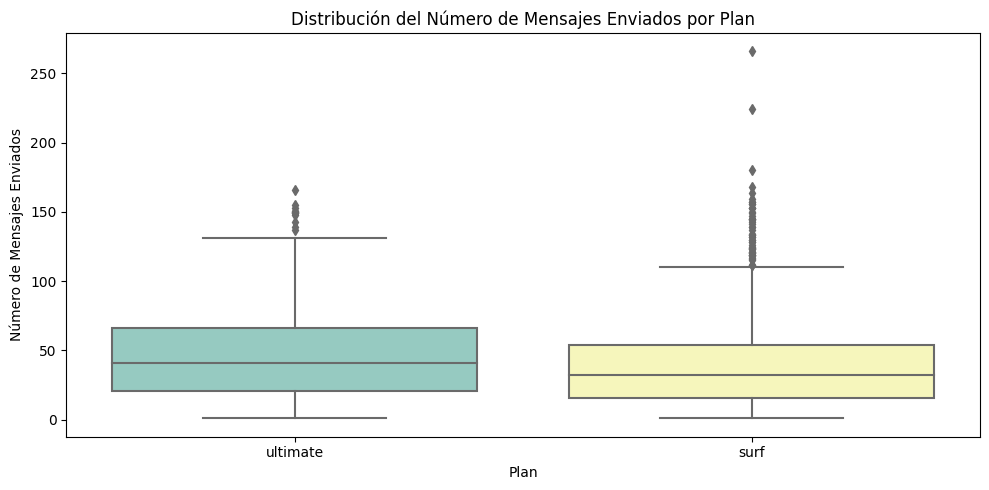

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Se unen los datos de mensajes con los datos de usuarios
messages_with_plan = messages_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Extraer el mes de cada mensaje
messages_with_plan['month'] = pd.to_datetime(messages_with_plan['message_date']).dt.to_period('M')

# Contar los mensajes por user-month
monthly_messages = messages_with_plan.groupby(['user_id', 'month'])['id'].count().reset_index()
monthly_messages.rename(columns={'id': 'num_messages'}, inplace=True)

# Unir los datos de mensajes con el plan de cada usuario
monthly_messages_with_plan = monthly_messages.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

plt.figure(figsize=(10, 5))
sns.boxplot(x='plan', y='num_messages', data=monthly_messages_with_plan, palette='Set3')

plt.title('Distribución del Número de Mensajes Enviados por Plan')
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Enviados')
plt.tight_layout()

plt.show()


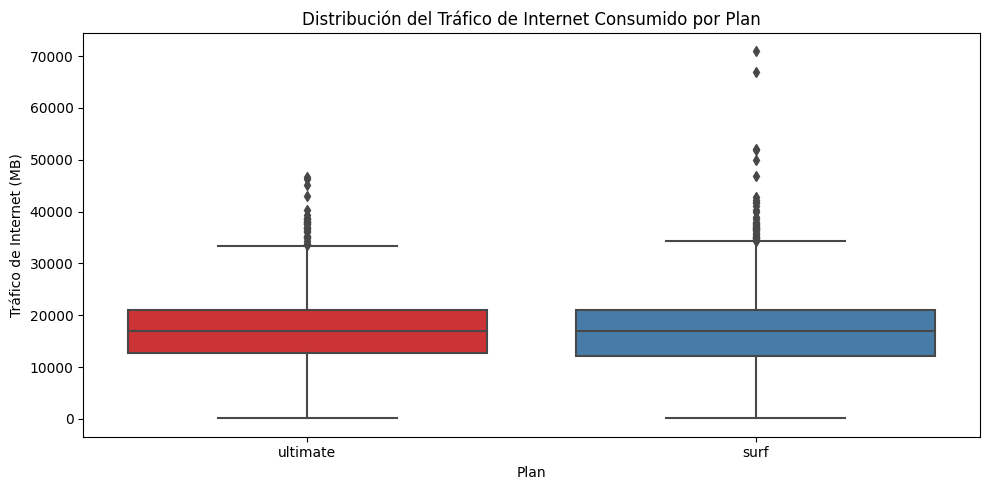

In [36]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Se unen los datos de Internet con los datos de usuarios
internet_with_plan = internet_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Extraer el mes de cada sesión de Internet
internet_with_plan['month'] = pd.to_datetime(internet_with_plan['session_date']).dt.to_period('M')

# 3. Internet por usuario y mes
monthly_internet = internet_with_plan.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# 4. Unir los datos de tráfico con el plan de cada usuario
monthly_internet_with_plan = monthly_internet.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

plt.figure(figsize=(10, 5))  
sns.boxplot(x='plan', y='mb_used', data=monthly_internet_with_plan, palette='Set1')

plt.title('Distribución del Tráfico de Internet Consumido por Plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet (MB)')
plt.tight_layout()

plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
El comportamiento de los usuarios con respecto a los mensajes sí varía conforme al tipo de plan. Los usuarios del plan surf tienden a enviar menos mensajes, mientras que los del plan ultimate tienen una mayor cantidad de mensajes enviados, lo que puede estar relacionado con las mayores inclusiones de servicio en el plan.

### Internet

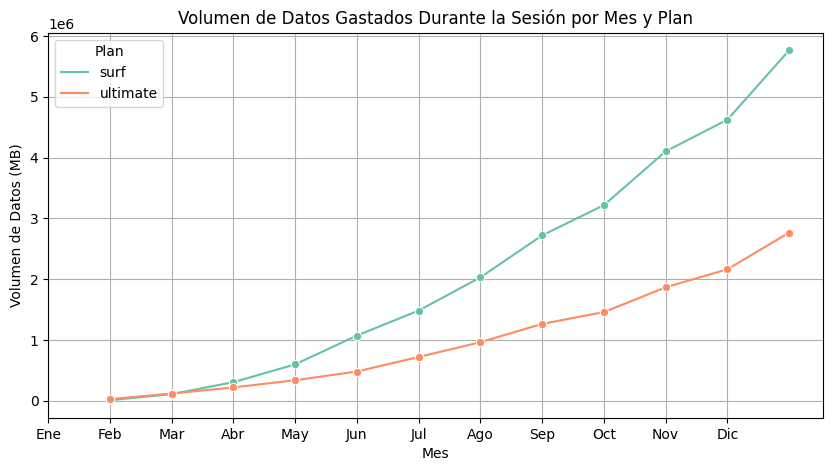

In [37]:
# Compara el volumen de datos gastados durante la sesión entre los meses del año y por cada plan 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Confirmar formato
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Extraer mes
internet_df['month'] = internet_df['session_date'].dt.month

# Internet-Plans
internet_with_plans = internet_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Month-Plan
monthly_data_usage_by_plan = internet_with_plans.groupby(['month', 'plan'])['mb_used'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data_usage_by_plan, x='month', y='mb_used', hue='plan', marker='o', palette='Set2')

# Personalizar el gráfico
plt.title('Volumen de Datos Gastados Durante la Sesión por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Volumen de Datos (MB)')
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Plan')
plt.grid(True)

plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
Las diferencias entre los planes afectan no solo el volumen de datos consumidos, sino también la forma en que los usuarios gestionan su consumo mensual y las decisiones que toman sobre el uso de datos adicionales o la renovación de su plan.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [38]:
import pandas as pd

# Unir los datos de plan-user para obtener el costo mensual
users_with_plans = users_df.merge(plans_df[['plan_name', 'usd_monthly_pay']], left_on='plan', right_on='plan_name', how='left')

# Calcular los ingresos mensuales de cada usuario
users_with_plans['monthly_income'] = users_with_plans['usd_monthly_pay']

income_stats = users_with_plans['monthly_income'].describe()

print("Estadísticas descriptivas sobre los ingresos mensuales de los usuarios:")
print(income_stats)

# Agrupar por plan y calcular el ingreso total por plan
total_income_by_plan = users_with_plans.groupby('plan')['monthly_income'].sum().reset_index()

print("Ingreso total por plan:")
print(total_income_by_plan)

Estadísticas descriptivas sobre los ingresos mensuales de los usuarios:
count    500.000000
mean      36.100000
std       23.385546
min       20.000000
25%       20.000000
50%       20.000000
75%       70.000000
max       70.000000
Name: monthly_income, dtype: float64
Ingreso total por plan:
       plan  monthly_income
0      surf            6780
1  ultimate           11270


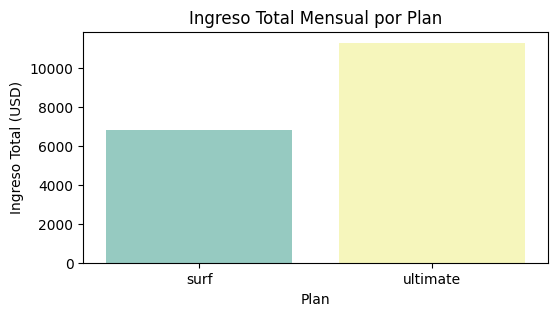

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.barplot(data=total_income_by_plan, x='plan', y='monthly_income', palette='Set3')
plt.title('Ingreso Total Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Total (USD)')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
El plan que genera mas ingresos es el ultimate 

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats

calls_df = pd.read_csv('/datasets/megaline_calls.csv', ',') 
internet_df = pd.read_csv('/datasets/megaline_internet.csv', ',') 
messages_df = pd.read_csv('/datasets/megaline_messages.csv', ',')
plans_df = pd.read_csv('/datasets/megaline_plans.csv', ',') 
users_df = pd.read_csv('/datasets/megaline_users.csv', ',') 

# Redondeamos la duración de las llamadas
calls_df['duration'] = np.ceil(calls_df['duration'])

# Año-Mes
for df in [calls_df, internet_df, messages_df]:
    df['month'] = pd.to_datetime(df.iloc[:, 2]).dt.to_period('M')

# Uso mensual por usuario
calls_per_month = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index()
internet_per_month = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
messages_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages')

# Unir con datos de usuarios
df_usage = users_df.merge(calls_per_month, on='user_id', how='left')
df_usage = df_usage.merge(internet_per_month, on=['user_id', 'month'], how='left')
df_usage = df_usage.merge(messages_per_month, on=['user_id', 'month'], how='left')

# Reemplazar NaN con 0 (usuarios sin uso en un mes)
df_usage[['duration', 'mb_used', 'messages']] = df_usage[['duration', 'mb_used', 'messages']].fillna(0)

# Unir con datos del plan
df_usage = df_usage.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

# Ingresos mensuales
def calcular_ingresos(row):
    extra_minutes = max(0, row['duration'] - row['minutes_included']) * row['usd_per_minute']
    extra_messages = max(0, row['messages'] - row['messages_included']) * row['usd_per_message']
    extra_gb = max(0, (row['mb_used'] - row['mb_per_month_included']) / 1024) * row['usd_per_gb']
    return row['usd_monthly_pay'] + extra_minutes + extra_messages + extra_gb

df_usage['total_revenue'] = df_usage.apply(calcular_ingresos, axis=1)

# Filtrar ingresos por plan
ultimate_revenue = df_usage[df_usage['plan'] == 'ultimate']['total_revenue']
surf_revenue = df_usage[df_usage['plan'] == 'surf']['total_revenue']

# Prueba de hipótesis
alpha = 0.05

# Comprobamos si las distribuciones de ingresos son normales
test_stat, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print(f"Prueba de hipótesis: Estadístico = {test_stat}, p-valor = {p_value}")
if p_value < alpha:
    print("Rechazamos H0: Los ingresos promedio SON significativamente diferentes.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para decir que los ingresos son distintos.")


Prueba de hipótesis: Estadístico = 11.13717241771176, p-valor = 6.43537005535934e-28
Rechazamos H0: Los ingresos promedio SON significativamente diferentes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [55]:
# Prueba las hipótesis

# Separar usuarios de NY-NJ y otras regiones
ny_nj_users = df_usage[df_usage['city'].str.contains('New York-Newark-Jersey City', na=False)]
other_users = df_usage[~df_usage['city'].str.contains('New York-Newark-Jersey City', na=False)]

# Ingresos de cada grupo
ny_nj_revenue = ny_nj_users['total_revenue']
other_revenue = other_users['total_revenue']

alpha = 0.05
test_stat, p_value = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Resultados de la prueba
print(f"Prueba de hipótesis: Estadístico = {test_stat}, p-valor = {p_value}")

# Conclusión
if p_value < alpha:
    print("Rechazamos H0: Los ingresos promedio SON significativamente diferentes.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para decir que los ingresos son distintos.")

Prueba de hipótesis: Estadístico = -2.63033243616209, p-valor = 0.008767510003273856
Rechazamos H0: Los ingresos promedio SON significativamente diferentes.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Se planteó la hipótesis nula (H₀) indicando que el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.

La hipótesis alternativa (H₁) sugiere que los ingresos promedio son significativamente diferentes entre las dos regiones.

Este análisis permitió evaluar de manera rigurosa si existen diferencias significativas en los ingresos entre usuarios del área NY-NJ y el resto del país. Los métodos elegidos aseguraron resultados confiables sin necesidad de pruebas adicionales de normalidad o métodos no paramétricos.